In [1]:
#Library
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['movieid' , 'title' , 'genres'],engine='python')
ratings = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['userid' , 'movieid' , 'rating' , 'timestamp'],engine='python' )
users = pd.read_csv('users.dat' , delimiter = '::' , names = ['userid' , 'gender' , 'age' ,'occupation' ,'zip_code'],engine='python')

In [3]:
#Descriptive Analysis
movies.head()

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
users.head()

,userid,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieid  3883 non-null   int64 
 1   title    3883 non-null   object
 2   genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userid     1000209 non-null  int64
 1   movieid    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userid      6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [9]:
ratings=ratings.drop('timestamp',axis = 1)
users=users.drop('zip_code',axis = 1)

### Create a new dataset Master_Data with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [10]:
df=pd.merge(ratings,users,on='userid')
master_data=pd.merge(movies,df,on='movieid')

In [11]:
master_data.head()

,movieid,title,genres,userid,rating,gender,age,occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,F,50,9
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,M,25,12
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,M,25,17
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,F,35,1


In [12]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movieid     1000209 non-null  int64 
 1   title       1000209 non-null  object
 2   genres      1000209 non-null  object
 3   userid      1000209 non-null  int64 
 4   rating      1000209 non-null  int64 
 5   gender      1000209 non-null  object
 6   age         1000209 non-null  int64 
 7   occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


### User Age Distribution

In [13]:
labels = {1 :'under 18' , 18 :'18-24' , 25 : '25-34' , 35 : '35-44', 45 : '45-49', 50 : '50-55' , 56 : '56+'}
master_data['age_name']=master_data['age'].map(labels)
df=(master_data['age'].map(labels).value_counts(normalize = True)*100).to_frame()
df.reset_index(inplace=True)

In [14]:
df=df.rename(columns={'index':'Age_Name','age':'Percentage_Occurance'})

In [15]:
df

,Age_Name,Percentage_Occurance
0,25-34,39.547335
1,35-44,19.896142
2,18-24,18.349765
3,45-49,8.361552
4,50-55,7.247485
5,56+,3.877190
6,under 18,2.720531


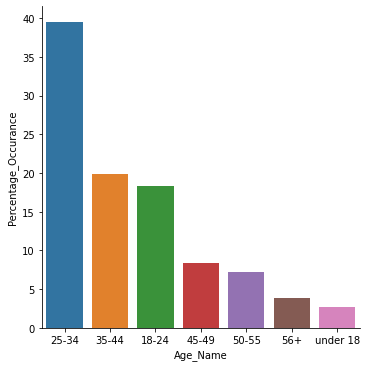

In [16]:
sns.catplot(x="Age_Name", y="Percentage_Occurance", kind="bar", data=df)

In [17]:
#User rating of the movie “Toy Story”
df=master_data.groupby(['title'])['rating'].mean().to_frame().sort_values('rating',ascending=False)
df.reset_index(inplace=True)

In [18]:
df[df['title']=='Toy Story (1995)']

,title,rating
202,Toy Story (1995),4.146846


In [19]:
#Top 25 movies by viewership rating
df.head(25)

,title,rating
0,Ulysses (Ulisse) (1954),5.000000
1,Lured (1947),5.000000
2,Follow the Bitch (1998),5.000000
3,Bittersweet Motel (2000),5.000000
4,Song of Freedom (1936),5.000000
5,One Little Indian (1973),5.000000
6,Smashing Time (1967),5.000000
7,Schlafes Bruder (Brother of Sleep) (1995),5.000000
8,"Gate of Heavenly Peace, The (1995)",5.000000
9,"Baby, The (1973)",5.000000


In [20]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
master_data[master_data['userid']==2696]

,movieid,title,genres,userid,rating,gender,age,occupation,age_name
95261,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,M,25,7,25-34
200536,800,Lone Star (1996),Drama|Mystery,2696,5,M,25,7,25-34
270342,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,M,25,7,25-34
274576,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,M,25,7,25-34
349333,1258,"Shining, The (1980)",Horror,2696,4,M,25,7,25-34
360382,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,M,25,7,25-34
448293,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,M,25,7,25-34
457193,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,M,25,7,25-34
459835,1625,"Game, The (1997)",Mystery|Thriller,2696,4,M,25,7,25-34
464473,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,M,25,7,25-34


In [21]:
master_data[master_data['userid']==2696].groupby(['userid'])['rating'].mean()

userid
2696    3.3
Name: rating, dtype: float64

In [22]:
#Find out all the unique genres
genres=''
for i in master_data['genres'].unique():
    genres+=i

In [23]:
set(genres.split("|"))

{'Adventure',
 'AdventureCrime',
 'Animation',
 'AnimationComedy',
 "Children's",
 "Children'sAction",
 "Children'sActionAction",
 "Children'sDramaAction",
 "Children'sHorror",
 "Children'sMusical",
 'Comedy',
 'ComedyAction',
 'ComedyAdventure',
 "ComedyChildren's",
 'ComedyCrime',
 'ComedyDrama',
 'Crime',
 'CrimeAction',
 'CrimeAnimation',
 "CrimeChildren's",
 'CrimeComedy',
 'CrimeCrimeDrama',
 'DocumentaryDocumentary',
 'Drama',
 'DramaAction',
 'DramaComedy',
 'DramaComedyAction',
 'DramaCrime',
 'DramaDocumentaryDrama',
 'DramaDrama',
 'Fantasy',
 'FantasyAction',
 'FantasyAdventure',
 'FantasyAnimation',
 "FantasyChildren's",
 'FantasyComedy',
 'FantasyCrime',
 'FantasyFilm-Noir',
 'FantasyMusical',
 'FantasySci-Fi',
 'FantasySci-FiDocumentary',
 'Film-Noir',
 'Film-NoirAction',
 'Film-NoirAdventure',
 'Film-NoirComedy',
 'Horror',
 'HorrorAction',
 'HorrorAdventure',
 'HorrorAnimation',
 'HorrorComedy',
 'HorrorCrime',
 'HorrorFilm-Noir',
 'HorrorHorror',
 'Musical',
 'Musical

In [24]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
from tqdm import tqdm 
movie_genres = dict(zip( movies['title'] , movies['genres'].str.split('|') ))

for index , title in tqdm(dict(master_data['title']).items()):
    for genre in movie_genres[title]:
        master_data.at[index , genre] = 1

100%|█████████████████████████████████████████████████████████████████████| 1000209/1000209 [00:55<00:00, 17901.86it/s]


In [25]:
master_data=master_data.replace(np.nan,0)

In [29]:
master_data.columns

Index(['movieid', 'title', 'genres', 'userid', 'rating', 'gender', 'age',
       'occupation', 'age_name', 'Animation', 'Children's', 'Comedy',
       'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime',
       'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical',
       'Mystery', 'Film-Noir', 'Western'],
      dtype='object')

In [31]:
master_data.head(1)

,movieid,title,genres,userid,rating,gender,age,occupation,age_name,Animation,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10,under 18,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
master_data.corr()[['rating']].T

,movieid,userid,rating,age,occupation,Animation,Children's,Comedy,Adventure,Fantasy,...,Crime,Thriller,Horror,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western
rating,-0.064042,0.012303,1.0,0.056869,0.006753,0.01967,-0.039829,-0.039622,-0.036718,-0.023312,...,0.033446,-0.004806,-0.094353,-0.044487,0.028098,0.075688,0.015643,0.015848,0.060259,0.007311
